#### Transform the feature of train dataset (yah to train) for both gas and Electricity

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Etrain = pd.read_csv('C:/TaiLieuHocTap/RMIT/C-2023/BigData/asignment2/As2-EEET574/Merged_dataset/Electricity/E-train.csv')
Etrain.head()

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,Year,Type,Company
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,7468CP,7471AA,ENTER,19,89.47,94.74,89.0,1x35,4122.0,89.47,0.0,2018,Electricity,Coteq
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AB,7471AB,GOOR,37,100.00,100.00,86.0,1x35,1800.0,94.59,0.0,2018,Electricity,Coteq
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AC,7471AC,GOOR,16,100.00,100.00,100.0,1x35,1315.0,100.00,0.0,2018,Electricity,Coteq
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,7471AD,7471AE,GOOR,25,92.00,84.00,44.0,1x35,6379.0,92.00,0.0,2018,Electricity,Coteq
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,7471AG,7471AG,GOOR,14,85.71,100.00,36.0,1x35,4404.0,92.86,0.0,2018,Electricity,Coteq


In [3]:
Etrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176807 entries, 0 to 176806
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   176807 non-null  object 
 1   purchase_area                 176807 non-null  object 
 2   street                        176807 non-null  object 
 3   zipcode_from                  176807 non-null  object 
 4   zipcode_to                    176807 non-null  object 
 5   city                          176807 non-null  object 
 6   num_connections               176807 non-null  int64  
 7   delivery_perc                 176807 non-null  float64
 8   perc_of_active_connections    176807 non-null  float64
 9   type_conn_perc                176807 non-null  float64
 10  type_of_connection            176807 non-null  object 
 11  annual_consume                176807 non-null  float64
 12  annual_consume_lowtarif_perc  176807 non-nul

# The target variable is annual_consume, so we should drop unsuitable column 

In [4]:
# drop zipcode and company colunm
Etrain = Etrain.drop(['zipcode_from','zipcode_to','Company','Type','Year'],axis=1)
Etrain.head()

,net_manager,purchase_area,street,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Dorpsstraat,ENTER,19,89.47,94.74,89.0,1x35,4122.0,89.47,0.0
1,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,GOOR,37,100.00,100.00,86.0,1x35,1800.0,94.59,0.0
2,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,GOOR,16,100.00,100.00,100.0,1x35,1315.0,100.00,0.0
3,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,De Stoevelaar,GOOR,25,92.00,84.00,44.0,1x35,6379.0,92.00,0.0
4,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Kerkstraat,GOOR,14,85.71,100.00,36.0,1x35,4404.0,92.86,0.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_28216\4014349577.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Etrain.corr()


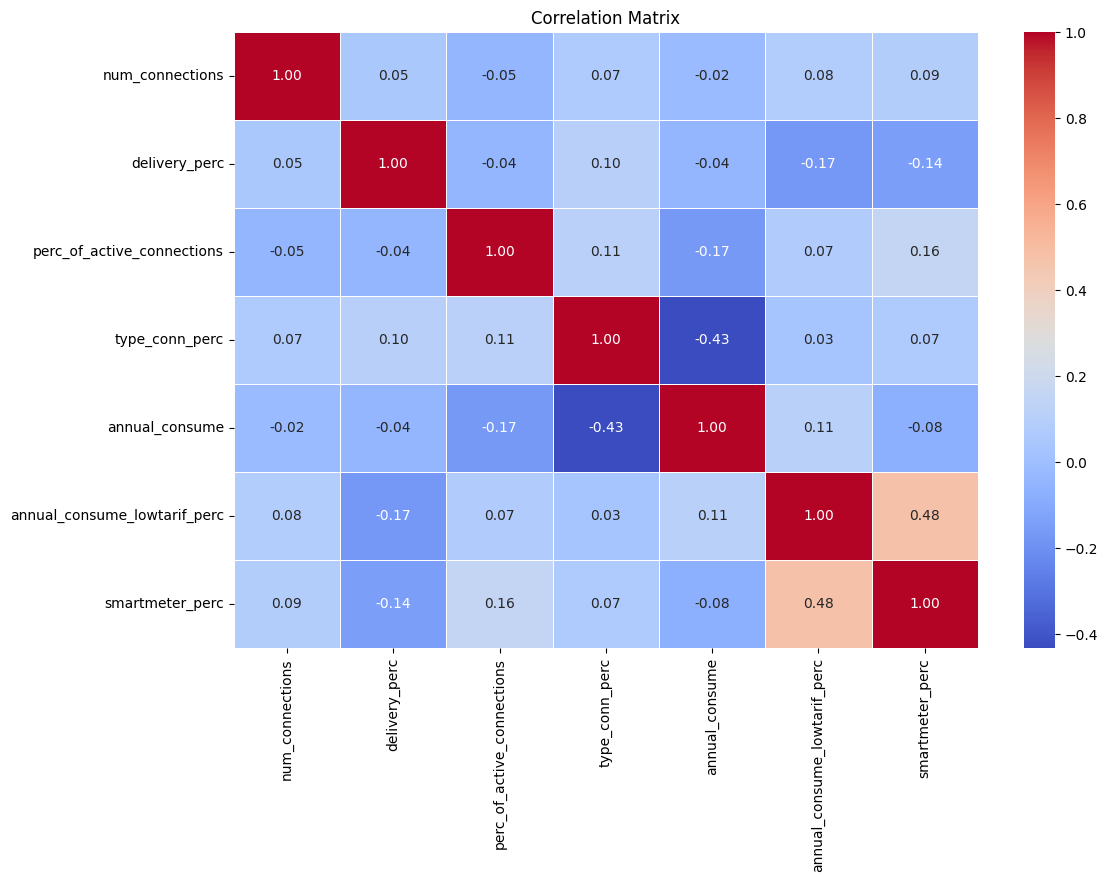

In [5]:
correlation_matrix = Etrain.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# # a plot between annual_consume and annual_consume_lowtarif_perc
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='annual_consume', y='annual_consume_lowtarif_perc', data=Etrain)
# plt.xlabel('annual_consume')
# plt.ylabel('annual_consume_lowtarif_perc')
# plt.title('annual_consume vs annual_consume_lowtarif_perc')
# plt.show()


- There's a general trend of increasing annual consumption with increasing annual consumption with a low tariff percentage

<AxesSubplot: >

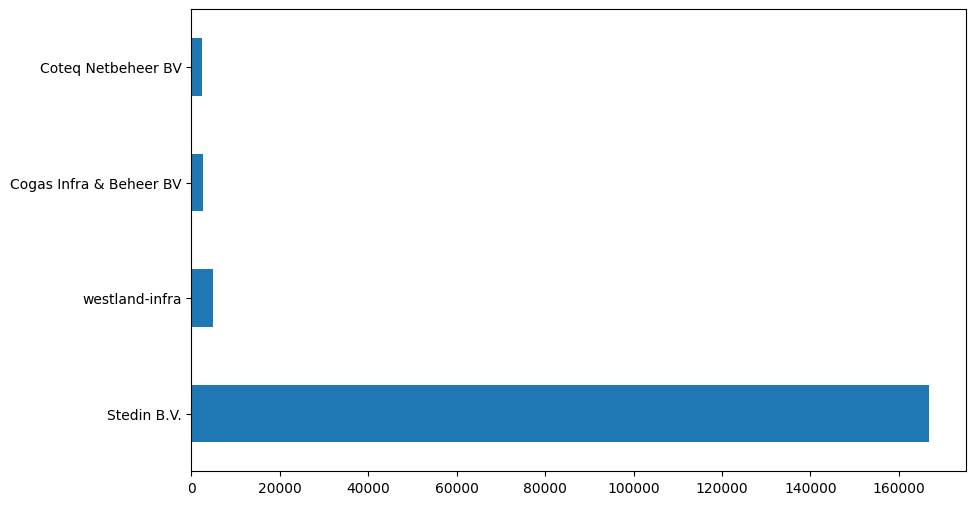

In [7]:
Etrain['net_manager'].value_counts().plot(kind='barh', figsize=(10, 6))

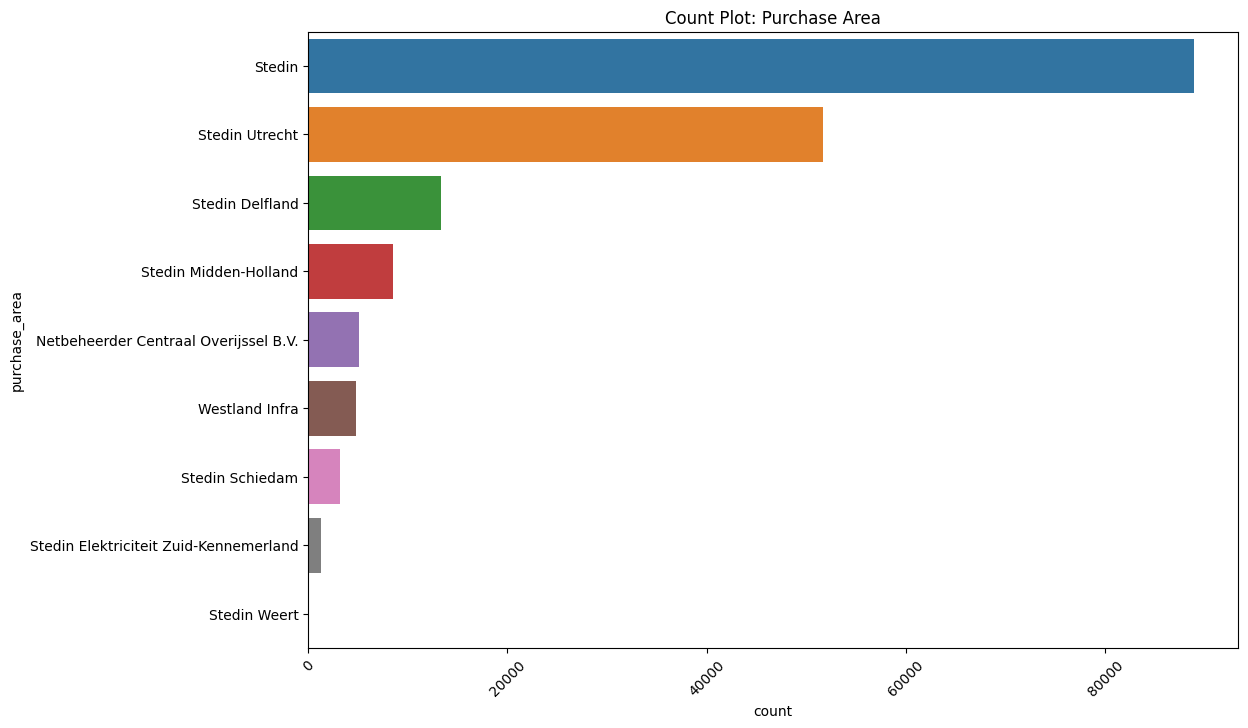

In [8]:
# countplot of purchase_area
plt.figure(figsize=(12, 8))
sns.countplot(y='purchase_area', data=Etrain, order=Etrain['purchase_area'].value_counts().index)
plt.title('Count Plot: Purchase Area')
plt.xticks(rotation=45)
plt.show()


In [9]:
# drop rows where purchase_area is is stedin weert
Etrain = Etrain[Etrain['purchase_area'] != 'Stedin Weert']

In [10]:
Etrain = Etrain[~Etrain['net_manager'].isin([8716925000002, 8716924000003])]

In [11]:
# # Create box plots for selected features
# plt.figure(figsize=(12, 8))
# sns.boxplot(x='type_of_connection', y='annual_consume', data=Etrain)
# plt.title('Box Plot: Type of Connection vs. Annual Consume')
# plt.show()

... dirty vcl

In [12]:
# the annual_consume is regression problem, so I will split  the data into 2 parts: train and test
Xetrain = Etrain.drop(['annual_consume'], axis=1)
Yetrain = Etrain['annual_consume']

In [13]:
numerical_columns = Xetrain.select_dtypes(include=['float64', 'int64']).columns

In [14]:
# import seaborn as sns
# # Create a pair plot for selected numerical features
# sns.pairplot(Etrain[numerical_columns],size = 2.5)
# plt.show()

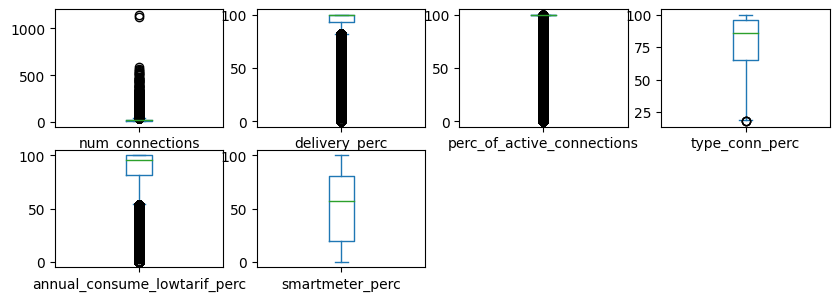

In [15]:
# plot the distribution of numerical variable 
Xetrain.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (10, 7))
plt.show()

In [16]:
from scipy.stats import skew

def check_skewness(data):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    skewness_result = pd.DataFrame({'Feature': numerical_columns, 'Skewness': [skew(data[col]) for col in numerical_columns]})
    return skewness_result
skewness_results = check_skewness(Xetrain)

# Display the results
print(skewness_results)


                        Feature  Skewness
0               num_connections  9.224934
1                 delivery_perc -3.833595
2    perc_of_active_connections -8.431161
3                type_conn_perc -0.710702
4  annual_consume_lowtarif_perc -1.836410
5               smartmeter_perc -0.150088


### Hmm 
--> Exponential Transformation for num_connection
- --> that ra cu dung boxcox het cung ngon do no hop cho positive dt

In [17]:
import numpy as np
from scipy.stats import boxcox
# Exponential transformation for num_connection
Xetrain['num_connections'] = np.log1p(Xetrain['num_connections'])
#boxcox transformation for delivery_perc
Xetrain['delivery_perc'], _ = boxcox(Xetrain['delivery_perc'] + 1)
Xetrain['perc_of_active_connections'], _ = boxcox(Xetrain['perc_of_active_connections'] + 1)
Xetrain['annual_consume_lowtarif_perc'] = np.sqrt(Xetrain['annual_consume_lowtarif_perc'])

 - hmm negative regression problem 

In [18]:
from scipy.stats import skew
#print skewness of each column 
skewness_results = check_skewness(Xetrain)
print(skewness_results)

                        Feature  Skewness
0               num_connections  1.090247
1                 delivery_perc -0.868528
2    perc_of_active_connections -2.215360
3                type_conn_perc -0.710702
4  annual_consume_lowtarif_perc -2.560256
5               smartmeter_perc -0.150088


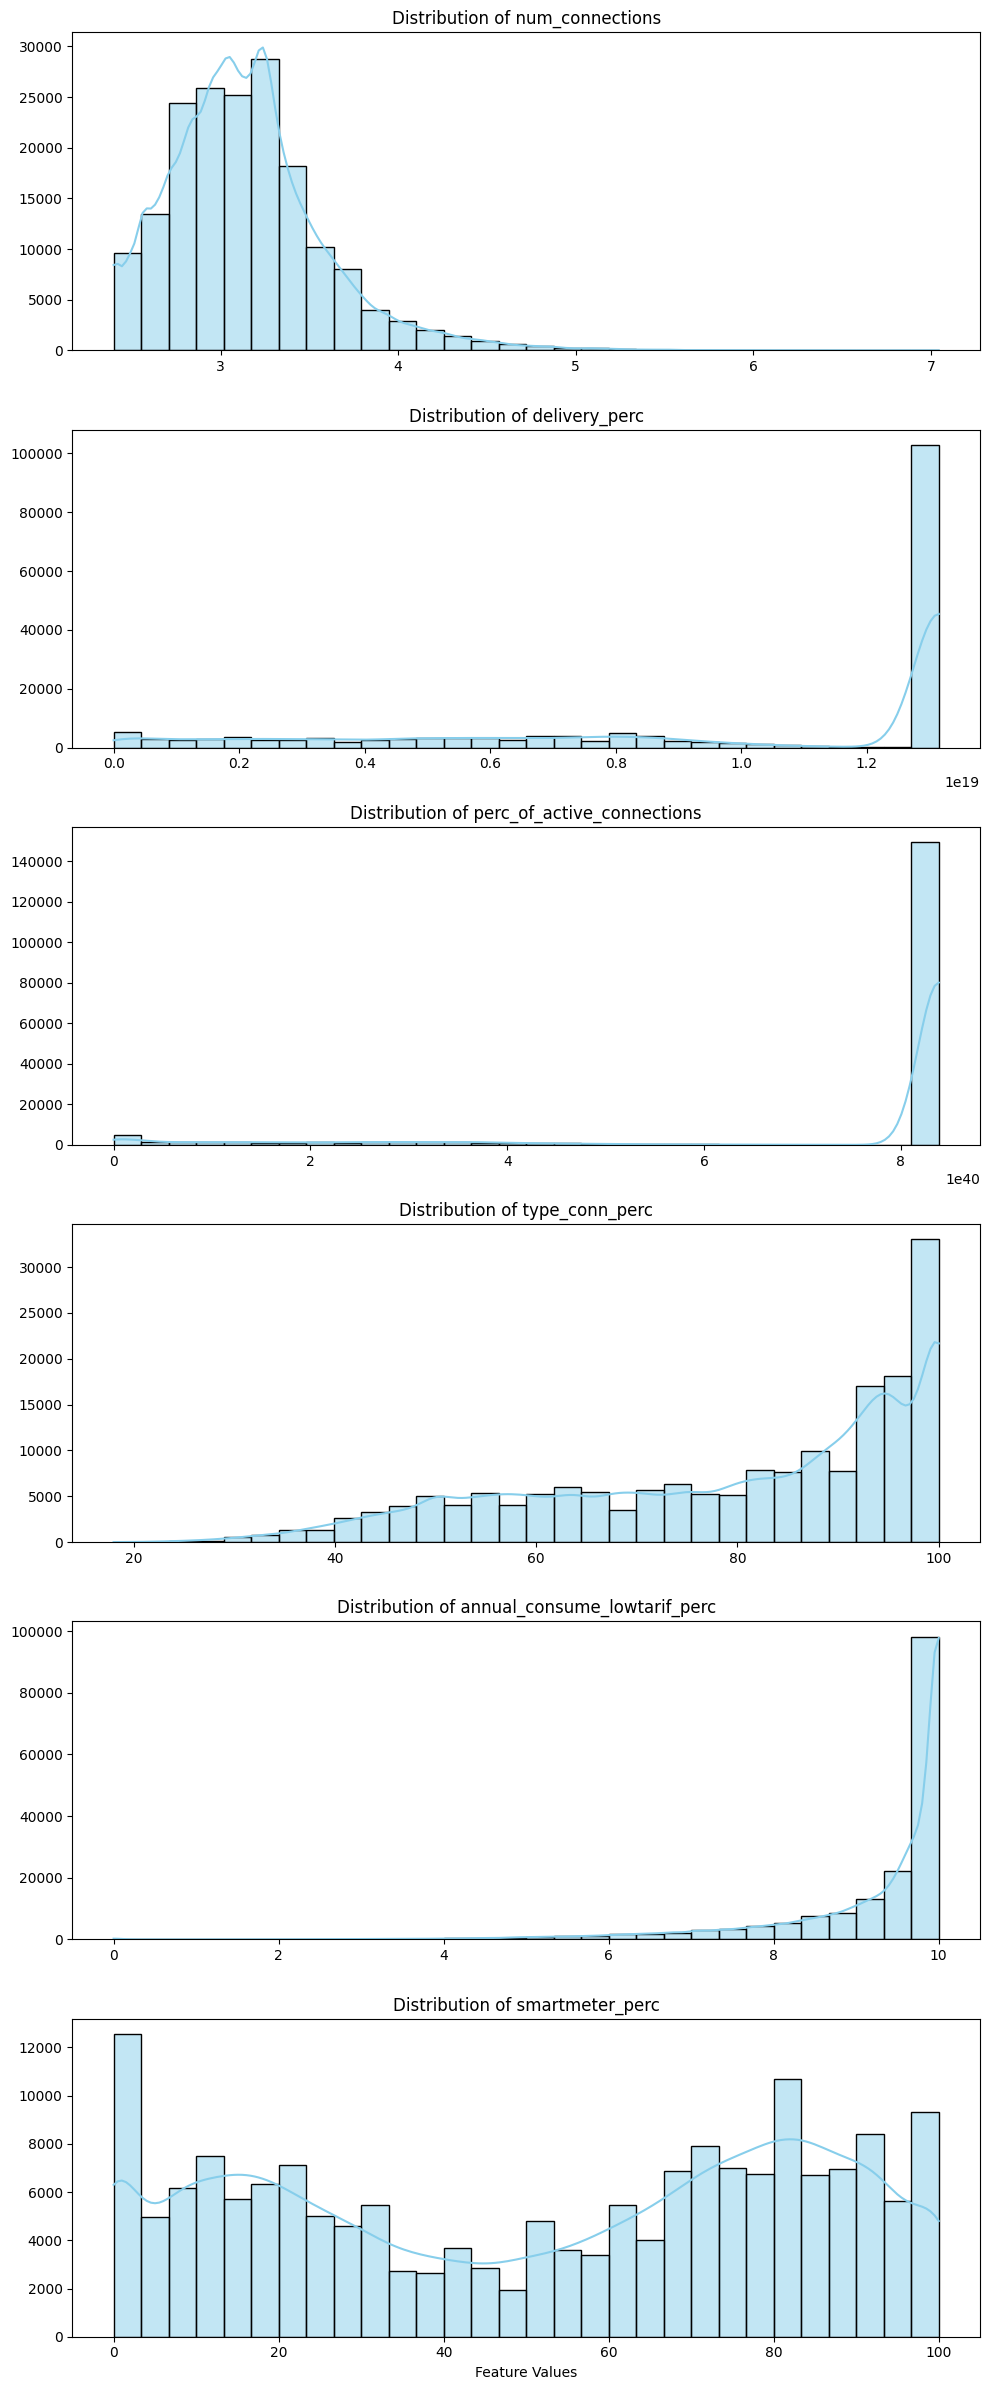

In [19]:
def plot_distributions(data):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 4 * len(numerical_columns)))
    for i, column in enumerate(numerical_columns):
    # Plot distribution
        sns.histplot(data[column], bins=30, kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    
    # Set common xlabel
    plt.xlabel('Feature Values')
    plt.tight_layout()
    plt.show()
plot_distributions(Xetrain)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = ['num_connections', 'delivery_perc', 'perc_of_active_connections', 'type_conn_perc' ,'annual_consume_lowtarif_perc', 'smartmeter_perc']
Xetrain[numeric_features] = scaler.fit_transform(Xetrain[numeric_features])

In [21]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['net_manager', 'purchase_area', 'street', 'city', 'type_of_connection']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    Xetrain[column] = label_encoder.fit_transform(Xetrain[column])

In [ ]:
# plot a correlation matrix
correlation_matrix = Xetrain.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5) 
plt.title('Correlation Matrix')
plt.show()

In [22]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_squared_error, r2_score


# # Assuming Xetrain is your preprocessed DataFrame
# X = Xetrain
# y = Yetrain

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# degree = 2

# # Create a pipeline with polynomial features, scaling, and linear regression
# model = make_pipeline(
#     PolynomialFeatures(degree=degree, include_bias=False, ),
#     StandardScaler(),
#     LinearRegression()
# )

# # Fit the model to the training data
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)


In [23]:
# from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# # Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print(f'MAE: {mae}')

# # R-squared (R2)
# r2 = r2_score(y_test, y_pred)
# print(f'R-squared: {r2}')

# # Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f'RMSE: {rmse}')


In [24]:
# # plot the result 
# plt.figure(figsize=(12, 8))
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted')
# plt.show()


In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Assuming Xetrain is your preprocessed DataFrame
X = Xetrain
y = Yetrain
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the degree of the polynomial
degree = 2

# Create pipelines for different algorithms
linear_regression_model = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=False),
    StandardScaler(),
    LinearRegression()
)

decision_tree_model = DecisionTreeRegressor(random_state=42)

random_forest_model = RandomForestRegressor(random_state=42)

svr_model = make_pipeline(
    StandardScaler(),
    SVR()
)

# Train the models
linear_regression_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = linear_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Display evaluation metrics
print("Linear Regression:")
print(f'Mean Squared Error: {mse_linear}')
print(f'R-squared: {r2_linear}')
print("\nDecision Tree:")
print(f'Mean Squared Error: {mse_decision_tree}')
print(f'R-squared: {r2_decision_tree}')
print("\nRandom Forest:")
print(f'Mean Squared Error: {mse_random_forest}')
print(f'R-squared: {r2_random_forest}')
print("\nSupport Vector Regressor:")
print(f'Mean Squared Error: {mse_svr}')
print(f'R-squared: {r2_svr}')


Linear Regression:
Mean Squared Error: 6134471.513162822
R-squared: 0.4475251729511295

Decision Tree:
Mean Squared Error: 9257016.461110158
R-squared: 0.16630657467939625

Random Forest:
Mean Squared Error: 5016806.139289758
R-squared: 0.5481829040701172

Support Vector Regressor:
Mean Squared Error: 9738051.122358432
R-squared: 0.12298425413272673


### for handling those thing, I have to split my dataset again dcm 

In [ ]:
# df_encoded = pd.concat([Xetrain, pd.get_dummies(Xetrain['zipcode_from'], prefix='zipcode_from'), 
#                         pd.get_dummies(Xetrain['zipcode_to'], prefix='zipcode_to')], axis=1)
# # df_encoded = df_encoded.drop(['zipcode_from', 'zipcode_to'], axis=1)
